# Python 文件与模块

- Python文件操作
- Python模块的制作与使用


### 1.4.1 文件

经过几百万年的演化，人类进化出了其他动物没有的“长期记忆”，进而拥有了语言、文化甚至发展出文明，走上了一条未曾设想的道路。在人类大脑中，“短期记忆”由海马体负责，“长期记忆”则由大脑皮层中的额叶负责；在计算机中也同样存在长短期记忆，短期记忆由程序中的变量负责，长期记忆则交给电脑中的文件系统。

### 1.4.1.1 open函数

Python open( ) 函数用于打开一个文件，并返回文件对象，在对文件进行处理过程都需要使用到这个函数。
Python中 文件也被认为一个对象
犹如Unix哲学一样 万物皆文件

- 在Unix系系统中写入文件:Mac / Linux: `echo Hello world >> test.txt`

open(file, mode) 函数主要有 file 和 mode 两个参数，其中 file 为需要读写文件的路径。mode 为读取文件时的模式，常用的模式有以下几个：

- r：以字符串的形式读取文件。 read
- rb：以二进制的形式读取文件。 read as bin
- w：写入文件。  write
- a：追加写入文件。 append

不同的模式下对象具有的功能也不一样

In [2]:
file_handle = open("test.txt","r")
print(type(file_handle)) ## file_handle在python中是一个IO对象

<class '_io.TextIOWrapper'>


### 1.4.1.2 文件对象

- close( ): 关闭文件 同一时间 一个文件只能被单独一个对象所持有,如果其他对象想持有文件,需要当前持有对象释放文件
- 在 r 与 rb 模式下：
    - read(): 读取整个文件
    - readline(): 读取文件的一行
    - readlines(): 读取文件的所有行
    
- 在 w 与 a 模式下：
    - write():
    - writelines():
    
    


In [7]:
## 读取文件中的全部内容
content = file_handle.read()
print(content)
file_handle.close()

`需要注意一点`

In [20]:
file = open("test.txt","r")
print(file.read())
print("--------------")
print(file.readline())
file.close()


Hello world!
Hello Python!!
Hello smart way!!!
--------------



发现这里readline没有生效?

open 函数返回的是一个指针，类似于你在 Microsolf Word 文档里编辑文档时闪烁的光标。在执行过 file.read( ) 操作后，由于读取了整个文件，这个指针已经来到了文件末尾，因此 file.readline( ) 没有获取到文件的内容。这种情况我们可以通过 close 方法关闭文件后再重新打开。

In [15]:
file_handle = open("test.txt","r")
print(type(file_handle)) ## file_handle在python中是一个IO对象

content = file_handle.readline()
print(content)
content = file_handle.readline()
print(content)
content = file_handle.readline()
print(content)
file_handle.close()

<class '_io.TextIOWrapper'>
Hello world!

Hello Python!!

Hello smart way!!!


在操作文件时，我们一定要注意每次操作结束后，及时通过 close( ) 方法关闭文件

以覆盖的方式写入文件

In [16]:
## 以 w 模式打开文件test.txt
file_handle=open("test.txt","w")
## 创建需要追加的字符串变量
content = "Hello world!\nHello Python!!\n"
## 写入到 test.txt 文件中
file_handle.write(content)
## 关闭文件对象
file_handle.close()


In [17]:
## 这里可以看到 w 是以覆盖的方式写入文件
with open("test.txt","r") as f:
    print(f.read())

Hello world!
Hello Python!!



以追加的方式写入文件

In [18]:
## 以 w 模式打开文件test.txt
file = open('test.txt', 'a')
## 创建需要追加的字符串变量
content = 'Hello smart way!!!'
## 写入到 test.txt 文件中
file.write(content)
## 关闭文件对象
file.close()

## 这里有个小trick 使用with方法会自动帮你close掉
with open("test.txt","r") as f:
    print(f.read())

Hello world!
Hello Python!!
Hello smart way!!!


## 1.4.2 模块

在普罗米修斯为人类带来火种后，人类制造出了各种各样的工具。工具的产生大大提高了人类的生产力，使人类从石器时代步入铁器时代、蒸汽时代以及现在的信息时代。

在之前的学习中，为了更简洁高效地完成任务，我们引入了函数、数据结构以及面向对象编程等工具。但每次我们在这个代码写完后，在下一个代码中只能把代码复制粘贴过去，而模块可以帮助我们把一个代码添加到另一个代码中，真正实现了工具等复用性。

编写模块的方式有很多，其中最简单的模块就是创建一个包含很多函数、变量以及类并以 .py 为后缀的文件。下面我们把上一节中实现的 class 类保存在 student.py 文件中：

In [27]:
file = open('student.py', 'w',encoding="utf-8")
file.write("""class student():
    def __init__(self, name, Math_score, Chinese_score):
        self.name = name
        self.Math_score = Math_score
        self.Chinese_score = Chinese_score
    
    ## repr 函数用于定义对象被输出时的输出结果
    def __repr__(self):
        return str((self.name, self.Math_score, self.Chinese_score))
    
    def change_score(self, course_name, score):
        if course_name == 'Math':
            self.Math_score = score
        elif course_name == 'Chinese':
            self.Chinese_score = score
        else:
            print(course_name, " course is still not in current system")
    
    def print_name(self,):
        print(self.name)
    
    name = 'Undefined'
    Math_score = None
    Chinese_score = None""")
file.close()

In [28]:
## 看下student.py

In [29]:
with open("student.py","r",encoding="utf-8") as f:
    print(f.read())

class student():
    def __init__(self, name, Math_score, Chinese_score):
        self.name = name
        self.Math_score = Math_score
        self.Chinese_score = Chinese_score
    
    ## repr 函数用于定义对象被输出时的输出结果
    def __repr__(self):
        return str((self.name, self.Math_score, self.Chinese_score))
    
    def change_score(self, course_name, score):
        if course_name == 'Math':
            self.Math_score = score
        elif course_name == 'Chinese':
            self.Chinese_score = score
        else:
            print(course_name, " course is still not in current system")
    
    def print_name(self,):
        print(self.name)
    
    name = 'Undefined'
    Math_score = None
    Chinese_score = None


使用 import 关键字可以把一个模块引入到一个程序来使用它的功能。记得在上一节中我们说过一个程序也可以是一个对象，这时 student.py 程序就成了一个对象，而里面的 student 类便成了它的对象变量。

In [31]:
## 引入student这个模块/程序对象
import student



In [32]:
xiaohu = student.student('XiaoHu', 65, 55)
print(xiaohu)

('XiaoHu', 65, 55)


官方解释:当我们只需要模块中的几个函数或类时，也可以采用 from model_name import xxx 的写法导入指定部分

自我解释:一般情况下 面向对象过程中 ，多个模块可能会包含了多个 `类` 我们也可以显示的指定仅导入模块中的某一个类


In [37]:
## 从student模块中导入student这个类
from student import student



In [38]:
## 这里就不需要再指定具体的模块了
xiaohu = student('XiaoHu', 65, 55)
print(xiaohu)

('XiaoHu', 65, 55)


在 Python 中内置了很多标准模块，例如用于数学操作的 math 模块与处理时间的 time 模块：

In [39]:
## 使用math模块中的log函数
import math
print(math.log(xiaohu.Math_score))

from math import log
print(log(xiaohu.Math_score))


4.174387269895637
4.174387269895637


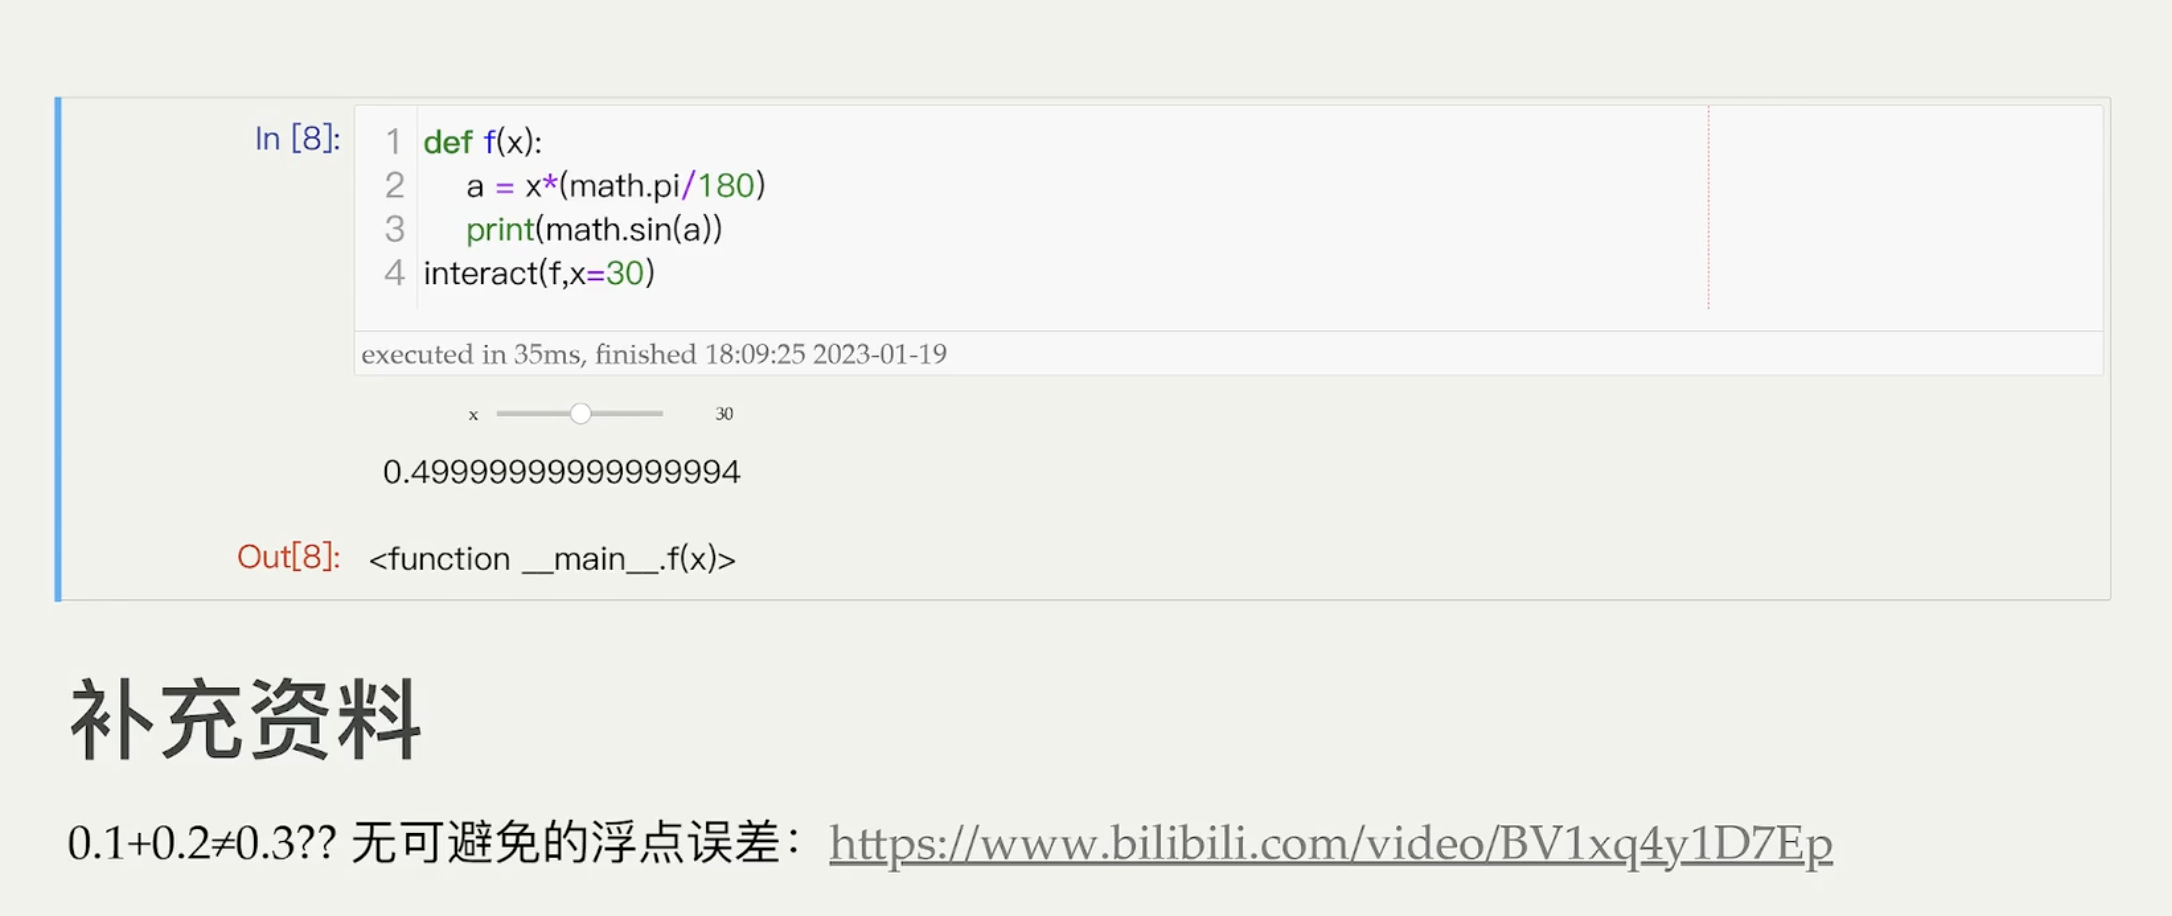

In [1]:
import time
## 通过 time 库中多个方法获取当前时间
## time.time 获取当前时间的 unix 时间戳
## time.loacltime 把当前时间的 unix 时间戳按照时区划分
## time.asctime 把按时区划分的时间戳转化成标准日期格式
print(time.asctime(time.localtime(time.time())))

Wed Jun  7 10:54:47 2023


python标准库中文地址

https://study.yali.edu.cn/pythonhelp/library/index.html

https://pypi.org/

除此之外，Python 还有很多标准库值得我们去探索。例如 re 库可以实现字符串正则表达式的匹配，random 用来生成随机数，urllib 用来访问互联网……

## 1.4.3 练习

之前我们实现了学生信息的“增删查改”功能，现在希望通过文件系统保存学生的信息，每次打开程序时可以载入，关闭程序时可以保存。

首先在这里恭喜各位同学完成了 Python 的全部学习内容！在这四章中希望你可以体会到本教程简洁明快的风格，这种风格与 Python 本身的代码设计风格是一致的。在 Tim Peters 编写的 “Python 之禅” 中的核心指导原则就是 “Simple is better than complex”。

纵观历史，你会看到苹果创始人史蒂夫·乔布斯对 Less is More 的追求，看到无印良品“删繁就简，去其浮华”的核心设计理念，看到山下英子在《断舍离》中对生活做减法的观点，甚至看到苏东坡“竹杖芒鞋轻胜马，一蓑烟雨任平生”的人生态度。你会发现极简主义不只存在于 Python 编程中，它本就是这个世界优雅的一条运行法则。

本练习让我们导入 this 模块，用心体会一下 Python 的设计原则。

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
